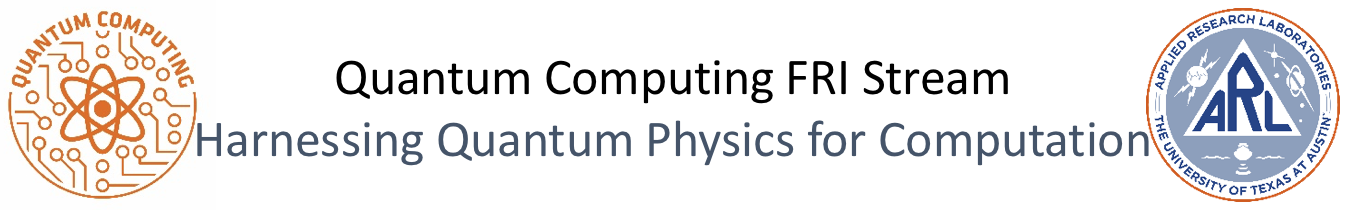

# RSA Encryption
## Lesson 11

### Imports (We don't need to use Qiskit this time)

In [4]:
import numpy as np
import string

## Today's Objectives

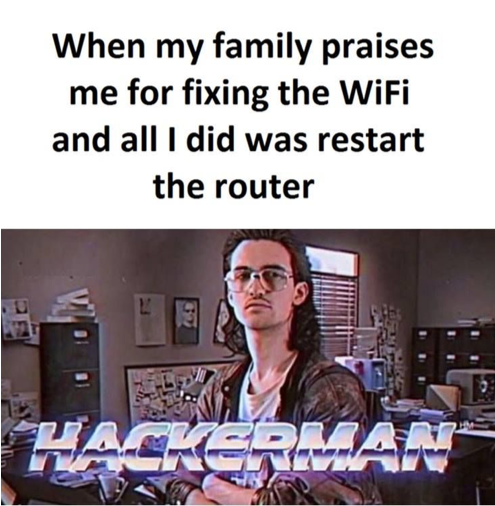

 - Generate a set of public and private keys for RSA encryption
 - Use a public key to encrypt a message
 - Use a private key to decrypt a message
 - Use prime factorization to _hack_ RSA

## Symmetric vs. Asymmetric Encryption


#### Symmetric Key Encryption
- Alice and Bob have the same key and use it for encryption/decryption.
- The keys need to be somehow shared between them securely.
- Can be truly secure only when key length = message length


#### Asymmetric Encryption
- Uses one key for encryption and a different key for decryption
- Basis for almost all modern-day Internet security (e.g. RSA encryption*)
- Relies on the computational difficulty of certain problems (typically factoring)
- __Public Key Encryption__ in particular works like a mailbox: anyone can put something in; only USPS can take it out


### Substitution Cipher

In an earlier lesson (1st semester) we discussed cryptography and looked at a substitution cipher as a first example of symmetric encrytion.

In the cells below, we have put together an example of using Python dictionaries to encode and decode with our substitution cipher.

In [5]:
#Generate Random Dictionaries for Encoding and Decoding
alphabet_string = string.ascii_lowercase + ' '
alphabet_list1 = list(alphabet_string)
alphabet_list2 = alphabet_list1.copy()
np.random.shuffle(alphabet_list2) #This is the randomization step
encode_cipher = dict(zip(alphabet_list1,alphabet_list2))
decode_cipher = dict((value,key) for key,value in encode_cipher.items())

In [6]:
plaintext = 'hey all you cool cats and kittens'

In [7]:
ciphertext = ''
for letter in plaintext:
  ciphertext+=encode_cipher[letter]

In [8]:
print(ciphertext)

motldhhltk lgkkhlgdqwldizlspqqoiw


In [9]:
decoded=''
for letter in ciphertext:
  decoded+=decode_cipher[letter]

In [10]:
print(decoded)

hey all you cool cats and kittens


In [11]:
#Take a look at the key to our substitution cipher
encode_cipher

{'a': 'd',
 'b': 'a',
 'c': 'g',
 'd': 'z',
 'e': 'o',
 'f': 'u',
 'g': 'e',
 'h': 'm',
 'i': 'p',
 'j': 'n',
 'k': 's',
 'l': 'h',
 'm': 'r',
 'n': 'i',
 'o': 'k',
 'p': 'c',
 'q': 'x',
 'r': 'v',
 's': 'w',
 't': 'q',
 'u': ' ',
 'v': 'f',
 'w': 'b',
 'x': 'y',
 'y': 't',
 'z': 'j',
 ' ': 'l'}

### One-Time Pad Encoding

We have also discussed encoding with a one-time pad which is a secret key intended to be used on only a single message in order to thwart in-depth analysis. The one-time pad is usually combined with the message through modular addition.

__For Example:__ Plaintext = 10101, Key = 01010, Ciphertext = 11111

Another version of the one-time pad is a list of numbers denoting the positional shift for each character in the message. We can use ***alphabet_list1*** from above to construct our message.

#### <font color=green> Exercise </font>

In [12]:
#1) Type in your message consisting only of lowercase letters and spaces. (This should be a string)
plaintext = 'it is spooky pumpkin silly awesome season'#YOUR MESSAGE HERE

In [13]:
#2) Use np.random.choice to generate a list of positional shifts
#(A shift of 25 takes you from 'a' to 'z')
sillylist = []
for i in range(len(plaintext)):
  sillylist.append(np.random.choice(26))
secret_key = sillylist
print(secret_key)

[25, 17, 17, 17, 22, 11, 9, 15, 21, 24, 6, 22, 7, 9, 22, 8, 15, 7, 13, 12, 13, 24, 0, 4, 22, 3, 20, 19, 3, 12, 4, 16, 21, 4, 9, 15, 17, 11, 25, 21, 11]


In [14]:
#Here we combine the message with the secret key by adding each letter's alphabetical position to the random shift
#Note that we use modular addition to ensure our index falls within the list
ciphertext=''
for i in range(len(plaintext)):
  ciphertext += alphabet_list1[(alphabet_list1.index(plaintext[i])+secret_key[i])%len(alphabet_list1)]
print(ciphertext)

gjqznkadilqtgypudrvzmpipgattzqwdgiigvlqiy


In [15]:
#3) Use the secret key to shift each letter's index back to its original position
#Hint: This can be accomplished in almost the same way as in the encoding step
decodetext=''
for i in range(len(plaintext)):
  decodetext += alphabet_list1[(alphabet_list1.index(ciphertext[i])-secret_key[i])%len(alphabet_list1)]

#YOUR CODE HERE

print(decodetext)

it is spooky pumpkin silly awesome season


## Brief History of RSA Encryption
<sup>* Ron Rivest, Adi Shamir, and Leonard Adleman (1978)

Invented in 1977 by Ronald Rivest, Adi Shamir, and Leonard Adleman of MIT.

Key idea formulated by Rivest one sleepless night after much heavy drinking

Founded RSA Data Security (now RSA Security) in 1982

MIT granted a patent in 1983

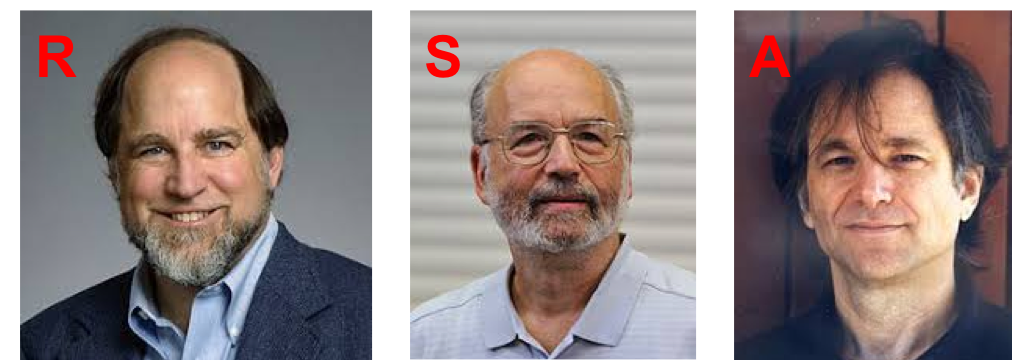

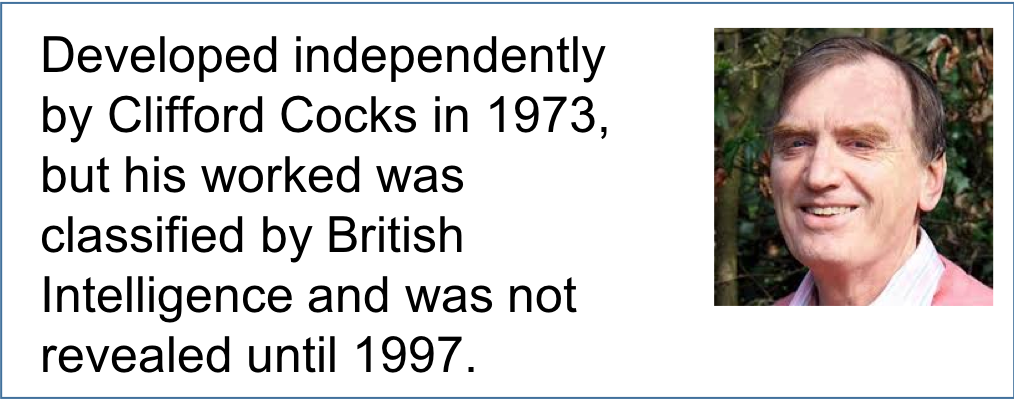

## Example of RSA Public Key Encryption

$\boxed{
\text{Alice freely offers her }\textbf{Public Key}: \color{red}{(7, 187)}\\
\text{Alice keeps secret her }\textbf{Private Key}: \color{blue}{23}}$

$\boxed{
\text{Bob uses }\color{red}{(7, 187)}\text{ to encrypt a message }x\text{ by computing }y=x^{\color{red}{7}}\left(\text{mod }\color{red}{187} \right) \\
\text{Alice uses }\color{blue}{23} \text{ to decrypt the message by computing }x=y^{\color{blue}{23}}\left(\text{mod }\color{red}{187} \right)}$

$\boxed{
\text{Unbeknownst to Bob (or anyone but Alice), }d=\color{blue}{23} \text{ is the solution to }\\ \color{red}{7}d\equiv 1 \left[\text{mod }{\color{blue}{(17-1)(11-1)}}\right]\text{ where }\color{red}{187}=\color{blue}{17*11}}$

$ \\ $

$\text{If an eavesdropper (Eve) could solve this problem, they could decrypt Bob's message!}$

## RSA in 5 Easy Steps

#### $1. \text{ Choose prime numbers }p\neq q \quad \text{ (e.g. }p=3, q=5)$

#### $2. \text{ Compute }N=pq \quad \text{ (e.g. }N=15)$

#### $3. \text{ Compute the totient }\phi(pq) = (p-1)(q-1)$
$\quad \phi(N) = \text{ the number of integers }<N \text{ sharing no common factors with }N$

$\quad\text{For }N=15:  \color{green}{\boxed{\text{1 2 }}}\color{red}{\text{3 }}\color{green}{\boxed{\text{4 }}}\color{red}{\text{5 6 }}\color{green}{\boxed{\text{7 8 }}}\color{red}{\text{9 10 }}\color{green}{\boxed{\text{11 }}}\color{red}{\text{12 }}\color{green}{\boxed{\text{13 14}}} \Rightarrow \phi(15)=8$

##### Aside about totients:

$\phi(N) = \text{ the number of integers }<N \text{ sharing no common factors with }N$

__Theorem__ $\text{If }p,q \text{ are prime, then }\phi(pq) = (p-1)(q-1)$

__Proof__

 $\text{- Start with the }pq-1\text{ integers less than }pq: 1,2,3,\dots,pq-1$

 $\text{- Take away the }q-1 \text{multiples of }p\text{ less than }pq: p,2p,3p,\dots, (q-1)p$

 $\text{- Take away the }p-1 \text{multiples of }q\text{ less than }pq: q,2q,3q,\dots, (p-1)q$
  
 $\text{- That leaves us with }(pq-1)-(q-1)-(p-1)\text{ integers}$

 $$(pq-1)-(q-1)-(p-1) = (p-1)(q-1) $$
 $$\text{QED!}$$

#### $4. \text{ Choose }e\text{ such that }1<e<M=\phi(N) \text{ and } e,M \text{ are co-prime}$

$\quad \text{Two integers }a,b \text{ are co-prime if they share no common factors.}$

$\quad \text{Equivalently, }a,b \text{ are co-prime if their greatest common divisor (gcd) is }1.$

$ $

$\quad \text{For }M=\phi(N)=8: \quad \color{red}{\text{2 }}\color{green}{\boxed{\text{3 }}}\color{red}{\text{4 }}\color{green}{\boxed{\text{5 }}}\color{red}{\text{6 }}\color{green}{\boxed{\text{7}}} \Rightarrow e \text{ could be }3,5,\text{ or} 7$

$ $

$$\boxed{\left(e,N\right) \text{ is the }\textbf{Public Key}}$$

#### $5. \text{ Compute a }d \text{ such that }de\equiv 1 \text{mod }M$

$$d=\frac{1+kM}{e} \text{ for some integer }k$$

$$\text{Stepping through integers for }\;M=8, \quad e= 5 : \qquad \frac{9}{5}, \frac{17}{5}, \frac{25}{5} = 5, \frac{33}{5}, \dots \Rightarrow d=5$$

$$\boxed{(d,N) \text{ is the }\textbf{Private Key}}$$

$ $

$\color{blue}{\text{ Note that }\left( x^{e} \text{ mod }M \right)^{d} = x^{de} \text{ mod }M = x}$

### Encoding

$\text{Bob has a message which he converts to an integer }x<N$

$\text{Using Alice's public key }(e,N) \text{ he computes }y=x^{e} \text{ mod }N$

#### Example

$(e,N) = (7,187) \text{ and }x=89 \text{ (ASCII for 'Y')}$

$$ y=89^{7}\text{ mod }187 = 166$$

$$\text{In Python: }\texttt{y= 89**7 % 187 }\\
\text{ or } \texttt{ y= pow(89, 7, 187)}$$

In [16]:
y1 = (89**7) %187
print(f'y method 1 = {y1}')

y2 = pow(89,7,187)
print(f'y method 2 = {y2}')

y method 1 = 166
y method 2 = 166


### Decoding

$\text{Using the private key }(d,N) \text{ Alice computes }x=y^{d} \text{ mod }N$

#### Example

$(d,N) = (23,187) \text{ and }y=166$

$$ x=166^{23}\text{ mod }187 = 89$$

$$\text{In Python: }\texttt{x= 166**23 % 187 }\\
\text{ or } \texttt{ x= pow(166, 23, 187)}$$

In [17]:
x1 = (y1**23)%187
print(f'x method 1 = {x1}')
x2 = pow(y2,23,187)
print(f'x method 2 = {x2}')

x method 1 = 89
x method 2 = 89


### <font color=green>Exercise</font>

Use the tools below to implement an RSA key generation algorithm.

 - Generate public and private keys.
 - Use these to encrypt and decrypt a message.
 - Use brute-force factorization to deduce the private key.
 - Using your hacked key, decrypt the message.

In [68]:
np.gcd(17,250)

1

Below are two Python functions that may be used for generating large prime numbers.

In [19]:
import math
import numpy as np
from random import randint

def is_prime(num, test_count):
    # Use a sample of test_count numbers to check if num is prime.
    # The algorithm uses the (probabilistic) Fermat primality test.

    # Check the obvious cases.
    if num == 1:
        return False
    if num % 2 == 0:
        return False

    # There's no point testing more numbers than are possible.
    if test_count >= num:
        test_count = num - 1

    for x in range(test_count):
        val = randint(1, num-1)
        # val and num are co-prime if val**(num-1) % num = 1.
        # (Fermat's little theorem)
        if pow(val, num-1, num) != 1:
            # Exit function and return False if a factor is found.
            return False

    # If no factors are found, assume that num is prime.
    # (Note that num might not actually be prime!)
    return True

def generate_big_prime(n, test_count=1):
    # returns a random prime number of length n bits

    found_prime = False
    while not found_prime:
        p = randint(2**(n-1), 2**n)
        # Check test_count samples to see if p is prime.
        if is_prime(p, test_count):
            return p

generate_big_prime(256)

69715716708627981707981618318061802454141444413043154108754941897930404493823

1) Write some Python code below that generates a public key (e, N) and private key (d, N) as described above.  Choose 8-bit integers for p and q.

In [20]:
171%9

0

In [64]:
n = 8 # n > 12 is slow.

# Choose p and q
p = generate_big_prime(n)
q = generate_big_prime(n)


N = p*q
M = (p-1)*(q-1)

# Compute e
e = 2
while np.gcd(e,M) != 1:
  e+=1
print(N,M,e)

#print(np.gcd(e,M))


# Compute d
k=1
while (1+k*M) % e != 0:
  k+=1
d = (1+k*M) // e
print(d)

# YOUR CODE HERE

print("Prime Factorization: " + str(N) + " = " + str(p) + " * " + str(q))
print("Public Key: " + "(" + str(e) + ", " + str(N) + ")")
print("Private Key: " + "(" + str(d) + ", " + str(N) + ")")

27221 26892 5
10757
Prime Factorization: 27221 = 163 * 167
Public Key: (5, 27221)
Private Key: (10757, 27221)


2) Write some Python code that generates a random integer message x < N.
Use the public key from above to construct the encrypted message y.

In [73]:
# YOUR CODE HERE
x = "hello you silly billy, you silly goose, you silly baka"

emptylist = []
for i in range(len(x)):
  emptylist.append((ord(x[i])**e)%N)
print(emptylist)




print("Unencrypted Message: x = " + str(x))
print("Encrypted Message: y = ", emptylist)

[21411, 17959, 11051, 11051, 20363, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 12161, 4786, 11051, 11051, 3635, 11406, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 24589, 20363, 20363, 2196, 17959, 11406, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 12161, 13050, 5941, 13050]
Unencrypted Message: x = hello you silly billy, you silly goose, you silly baka
Encrypted Message: y =  [21411, 17959, 11051, 11051, 20363, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 12161, 4786, 11051, 11051, 3635, 11406, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 24589, 20363, 20363, 2196, 17959, 11406, 18160, 3635, 20363, 6432, 18160, 2196, 4786, 11051, 11051, 3635, 18160, 12161, 13050, 5941, 13050]


3) Now, use the private key to decrypt the encrypted message y.  Do you recover the original message?

In [66]:
# YOUR CODE HERE
decrypt = []
for i in emptylist:
  decrypt.append(chr((i**d)%N))

print("Decrypted Message: ", decrypt)

Decrypted Message:  ['h', 'e', 'l', 'l', 'o', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'b', 'i', 'l', 'l', 'y', ',', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'g', 'o', 'o', 's', 'e', ',', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'b', 'a', 'k', 'a']


4) Write a function to determine the prime factors of N using a brute-force search.  Use this to infer the private key.  Does it correctly decrypt the message y?

In [76]:
def brute_force_factor(N): #return p, q
  # YOUR CODE HERE
  for i in range(N):
    for j in range(N):
      if i*j == N:
        return (i,j)




p_hacked, q_hacked = brute_force_factor(N)

M_hacked = (p_hacked-1)*(q_hacked-1)

### Compute d_hacked (Note: It could be different from the one above.)
# Compute e
e_hacked = 2
while np.gcd(e_hacked,M_hacked) != 1:
  e_hacked+=1

# Compute d
k_hacked=1
while (1+k_hacked*M_hacked) % e_hacked != 0:
  k_hacked+=1
d_hacked = (1+k_hacked*M_hacked) // e_hacked
###

x_hacked = [chr(x**d_hacked % N) for x in emptylist]
#x_hacked = pow(y, d_hacked, N)

print("Hacked Factorization: " + str(N) + " = " + str(p_hacked) + " * " + str(q_hacked))
print("Hacked Private Key: " + "(" + str(d_hacked) + ", " + str(N) + ")")
print("Hacked Message: " + str(x_hacked))

Hacked Factorization: 27221 = 163 * 167
Hacked Private Key: (10757, 27221)
Hacked Message: ['h', 'e', 'l', 'l', 'o', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'b', 'i', 'l', 'l', 'y', ',', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'g', 'o', 'o', 's', 'e', ',', ' ', 'y', 'o', 'u', ' ', 's', 'i', 'l', 'l', 'y', ' ', 'b', 'a', 'k', 'a']


For fun, share your public key and encrypted message with someone else.  Can you hack their encryption?

Yes, you can hack their encryption pretty easily because the numbers are still very small. Aravind's was easily hackable due to this fact; however, as the length of the message increases, so does the time it takes to brute force.